In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

# Generate two independent random walks, each with 100 observations

In [2]:
sample_size = 100

ts_df = pd.DataFrame(columns = ['X','Y'])
ts_df.loc[0] = [0,0]

for r in range(1,sample_size):
    ts_df.loc[r] = ts_df.loc[r-1]+np.random.normal(0,1,2)
    
ts_df['const'] = 1

In [3]:
beta_df = pd.DataFrame(columns = ['alpha','beta'])

for r in range(2,sample_size):
    reg = linear_model.LinearRegression()
    reg.fit( ts_df.loc[:r][['const','X']], ts_df.loc[:r][['Y']] )
    
    beta_df.loc[r] = reg.coef_[0]

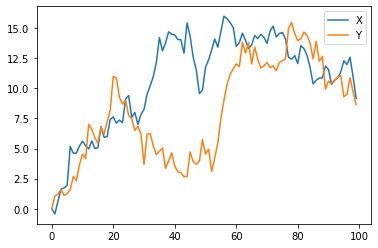

In [4]:
ts_df[['X','Y']].plot()

## Plot the (alpha,beta) obtained from linear regression when using only the time periods [0,t], for all possible t's. (This simulates what a backtest would look like)

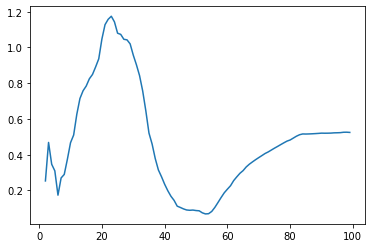

In [5]:
beta_df['beta'].plot()

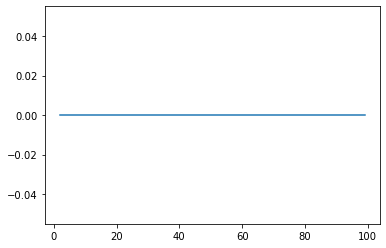

In [6]:
beta_df['alpha'].plot()

# We now generate the actual backtest, for this we look at Y[t+k] - OLS Forecast from time t using the true X[t+k] as a covariate. We do this for all t,k. (This simulates a backtest, expect that we ignore the requirement of needing to also forecast X)

In [7]:
back_test_df = pd.DataFrame(columns = ['t','k', 'forecast','actual','opt_forecast'])

i = 0
for time_period in range(2,sample_size):
    k = 0
    while(time_period + k < sample_size):
        test_period = time_period + k
        
        forecast = beta_df.loc[time_period,'alpha'] + beta_df.loc[time_period,'beta'] * ts_df.loc[test_period,'X']
        actual = ts_df.loc[test_period,'Y']
        opt_forecast = ts_df.loc[time_period,'Y']
        
        
        back_test_df.loc[i] = [time_period,k,forecast,actual, opt_forecast]
        k = k+1
        i = i+1
        
back_test_df['error'] = back_test_df['forecast'] - back_test_df['actual']
back_test_df['opt_error'] = back_test_df['opt_forecast'] - back_test_df['actual']

## We plot the errors for each k, this is done for both the Spurious OLS model and also the optimal (random walk) model

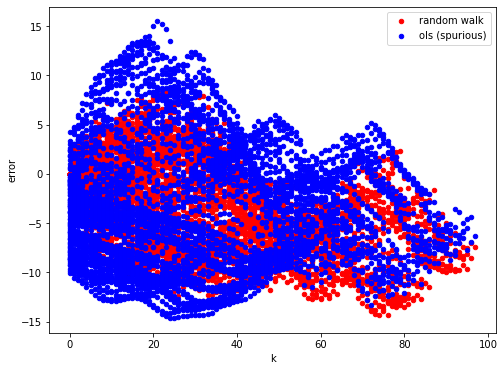

In [11]:
fig, ax = plt.subplots(figsize = (8,6))

back_test_df.plot.scatter(x='k',y='opt_error', color = 'red', ax = ax, label ='random walk')
back_test_df.plot.scatter(x='k',y='error', color = 'blue', ax = ax, label = 'ols (spurious)')
ax.legend()

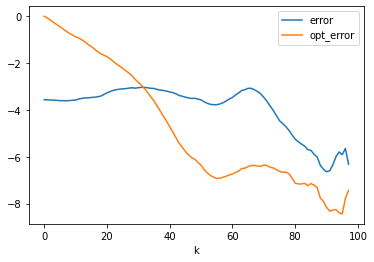

In [12]:
back_test_df[['k','error','opt_error']].groupby('k').mean().plot()

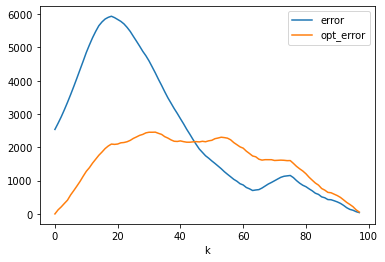

In [13]:
back_test_df[['k','error','opt_error']].groupby('k').agg(lambda s:  np.square(s).sum() ).plot()